<a href="https://colab.research.google.com/github/GabrielYYM/Notebooks/blob/main/BoostingPresentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [21]:
import kagglehub
kagglehub.login()
path = kagglehub.competition_download("titanic")
print (path)

/root/.cache/kagglehub/competitions/titanic


In [22]:
df = pd.read_csv("/root/.cache/kagglehub/competitions/titanic/train.csv")
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocesing

In [23]:
#drops
df = df.drop(['Cabin', 'Name', 'Parch', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,male,22.0,1,7.2500,S
1,2,1,1,female,38.0,1,71.2833,C
2,3,1,3,female,26.0,0,7.9250,S
3,4,1,1,female,35.0,1,53.1000,S
4,5,0,3,male,35.0,0,8.0500,S


In [24]:
#mediana
df['Age'] = df['Age'].fillna(df['Age'].median())

In [25]:
#onehot
categorical_cols = ['Sex', 'Embarked']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cols = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, encoded_df], axis=1)
df = df.drop(['Embarked_nan'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,7.2500,0.0,1.0,0.0,0.0,1.0
1,2,1,1,38.0,1,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,1,3,26.0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,4,1,1,35.0,1,53.1000,1.0,0.0,0.0,0.0,1.0
4,5,0,3,35.0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [26]:
#scaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,-0.565736,1,-0.502445,0.0,1.0,0.0,0.0,1.0
1,2,1,1,0.663861,1,0.786845,1.0,0.0,1.0,0.0,0.0
2,3,1,3,-0.258337,0,-0.488854,1.0,0.0,0.0,0.0,1.0
3,4,1,1,0.433312,1,0.420730,1.0,0.0,0.0,0.0,1.0
4,5,0,3,0.433312,0,-0.486337,0.0,1.0,0.0,0.0,1.0


# Model

In [27]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#XGBoost
xgb_model = XGBClassifier(
    learning_rate=0.05,
    n_estimators=400,
    max_depth=3,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

XGBoost Accuracy: 0.8044692737430168


In [29]:
#forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.8044692737430168


# ROC and AUC


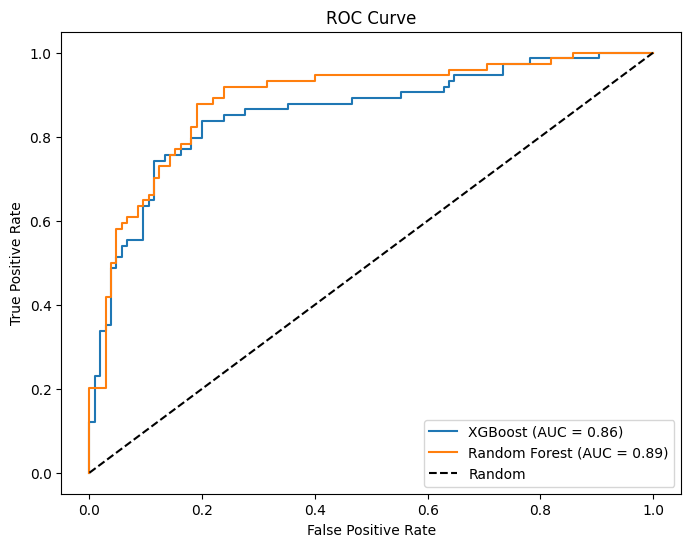

XGBoost ROC: 0.86
Random Forest ROC: 0.89


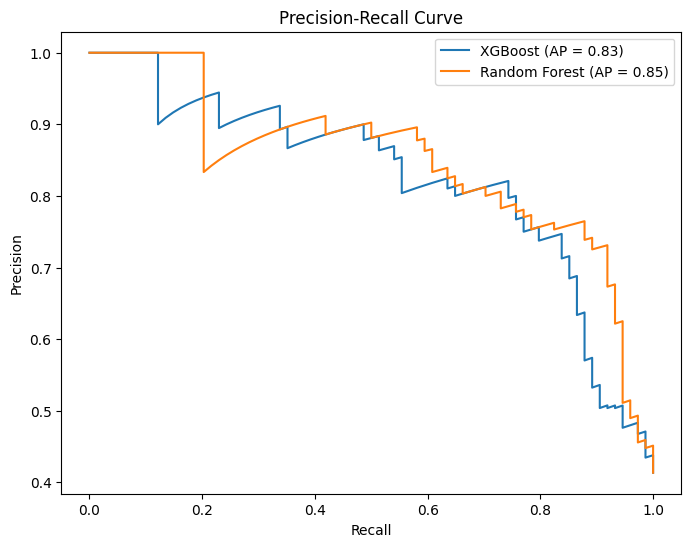

XGBoost Average Precision: 0.83
Random Forest Average Precision: 0.85


In [35]:
#XGBoost
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

#Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"XGBoost ROC: {auc_xgb:.2f}")
print(f"Random Forest ROC: {auc_rf:.2f}")

#XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
avg_precision_xgb = average_precision_score(y_test, y_pred_proba_xgb)

#Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
avg_precision_rf = average_precision_score(y_test, y_pred_proba_rf)

#curves
plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost (AP = {avg_precision_xgb:.2f})')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {avg_precision_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

print(f"XGBoost Average Precision: {avg_precision_xgb:.2f}")
print(f"Random Forest Average Precision: {avg_precision_rf:.2f}")
